In [ ]:
#TODO
'''
You're tasked with completing the following steps:

Load in the wine dataset from scikit learn.
For the wine dataset, create a train and test split, 80% train / 20% test.
Load the train/test data into the xgboost matrix
Create a XGBoost Classifier model with these hyperparameters:
Evaluate the model with the test dataset


Load the diabetes dataset from scikit learn
For the Diabetes dataset, create a train and test split, 80% train / 20% test.
Load the train/test data into the xgboost matrix
Create a XGBoost Regression model model with these hyperparameters:
Evaluate the model with the test dataset
'''

In [11]:
# Define import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

0.9722222222222222


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

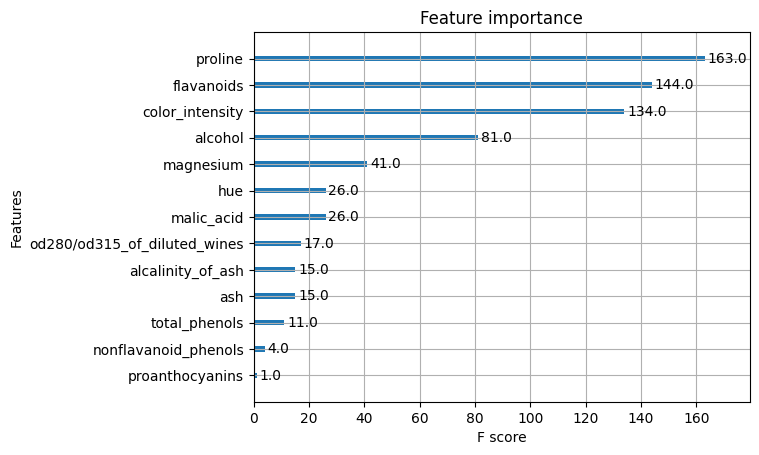

In [14]:
from sklearn import datasets
# Load in the wine dataset from scikit learn
data = load_wine()
data.keys()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
# For the wine dataset, create a train and test split, 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Load the train/test data into the xgboost matrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)
# Create a XGBoost Classifier model with these hyperparameters:
xgb_clf = xgb.XGBClassifier(max_depth= 5,eta= 0.1,objective= "multi:softmax")
xgb_clf.fit(X_train, y_train)
# Evaluate the model with the test dataset
xgb_clf.score(X_test, y_test)
print(xgb_clf.score(X_test, y_test))
xgb.plot_importance(xgb_clf)



## Method 2 - XGBoost Classifier with Matrix

In [13]:

from sklearn import datasets
# Load in the wine dataset from scikit learn
data = load_wine()
data.keys()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
# For the wine dataset, create a train and test split, 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Load the train/test data into the xgboost matrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
# Create a XGBoost Classifier model with these hyperparameters:
param  = {"max_depth": 5,"eta": 0.1,"objective": "multi:softmax","num_class":3,"num_round":100}
bst = xgb.train(param,dtrain)
# Evaluate the model with the test dataset
preds = bst.predict(dtest)
score = accuracy_score(y_test,preds)
print(score)


[06:08:32] WARNING: ../src/learner.cc:767: 
Parameters: { "num_round" } are not used.

0.9722222222222222


### The xgb.DMatrix() transformation is required in XGBoost when you want to use your data in a format that is optimized for performance within the XGBoost framework. It is particularly useful when you need to apply advanced features of XGBoost such as custom evaluation metrics, early stopping, or using data with weights.

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load in the diabetes dataset from scikit-learn
data = load_diabetes()

# Create pandas DataFrame for the input features
X = pd.DataFrame(data['data'], columns=data['feature_names'])

# Create pandas Series for the target variable
y = pd.Series(data['target'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the train/test data into the xgboost matrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# Print the shape of the training data matrix
print("Train matrix shape:", dtrain.num_row(), "rows and", dtrain.num_col(), "columns")

# Print the shape of the test data matrix
print("Test matrix shape:", dtest.num_row(), "rows and", dtest.num_col(), "columns")


Train matrix shape: 353 rows and 10 columns
Test matrix shape: 89 rows and 10 columns


In [ ]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 1,
    'learning_rate': 0.4,
    'n_estimators': 100
}
bst = xgb.train(params, dtrain)
# Calculate the model performance
preds = bst.predict(dtest)
print(r2_score(y_test, preds))

[19:19:12] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

0.45808529411951704


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load in the diabetes dataset from scikit-learn
data = load_diabetes()

# Create pandas DataFrame for the input features
X = pd.DataFrame(data['data'], columns=data['feature_names'])

# Create pandas Series for the target variable
y = pd.Series(data['target'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the train/test data into the xgboost matrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# Define the model parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 2,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Create model instance
bst = xgb.train(params, dtrain)

# Make predictions on the test set
preds = bst.predict(dtest)

# Evaluate model performance using mean squared error (MSE)
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error (MSE):", mse)


[19:11:00] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Squared Error (MSE): 5622.441369311783
